In [3]:
import pandas as pd
import cv2
import os
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import keras
import keras.backend as K
import json
# from keras_retinanet.models.resnet import custom_objects
# from keras_retinanet.models.resnet import resnet_retinanet as retinanet, custom_objects, download_imagenet
# import keras_retinanet
# import keras_retinanet.bin.train

In [4]:
train_data_simple = pd.read_json('../train_data_simple.json')
train_data_simple = train_data_simple.sort_index()
test_data = pd.read_json('../test_data.json')
test_data = test_data.sort_index()
retinanet_train_data =pd.read_json('retinanet_data.json')
retinanet_train_data = retinanet_train_data.sort_index()
retinanet_test_data =pd.read_json('retinanet_test_data.json')
retinanet_test_data = retinanet_test_data.sort_index()
with open('../hoi_dict.json', 'r') as f:
    hoi_dict = json.load(f)

## training data

In [5]:
image_no = -1

21
['ride', 'horse']
['straddle', 'horse']
action_no                       [140, 142]
human_bbox              [65, 260, 64, 420]
name           HICO_train2015_00000027.jpg
obj_id                                [17]
obj_list                           [horse]
object_bbox            [95, 318, 163, 598]
size                         [431, 640, 3]
Name: 21, dtype: object


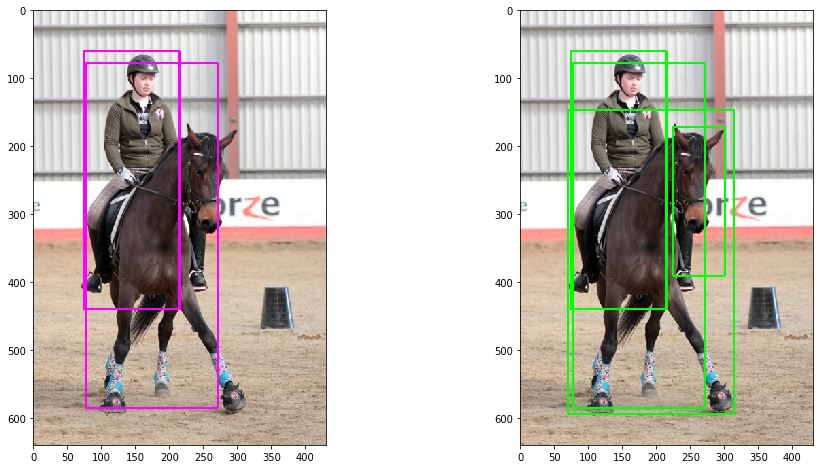

In [6]:
image_no=21
# image_no+=1
print(image_no)
input_img = cv2.imread('/home/jovyan/projectdata/cht01/hico_20160224_det/images/train2015/'+train_data_simple['name'][image_no])
RGB_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
# RGB_img = cv2.resize(RGB_img,(1200,800))
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)
for i in retinanet_train_data['human_boxes_scale'][image_no]:
    cv2.rectangle(RGB_img, (i[0],i[1]),(i[2],i[3]), (255,0,255), 2)
ax1.imshow(RGB_img)
for i in retinanet_train_data['obj_boxes_scale'][image_no]:
    cv2.rectangle(RGB_img, (i[0],i[1]),(i[2],i[3]), (0,255,0), 2)
ax2.imshow(RGB_img)

for i in train_data_simple['action_no'][image_no]:
    print(hoi_dict[str(i)])
print(train_data_simple.iloc[image_no])


## testing data

0
['sit_on', 'bench']
action_no                                             [246]
human_bbox     [[320, 359, 306, 349], [270, 311, 303, 350]]
invisible                                               [0]
name                             HICO_test2015_00000001.jpg
object_bbox                          [[148, 376, 345, 414]]
pair_no                                    [[1, 1], [2, 1]]
size                                          [640, 427, 3]
Name: 0, dtype: object


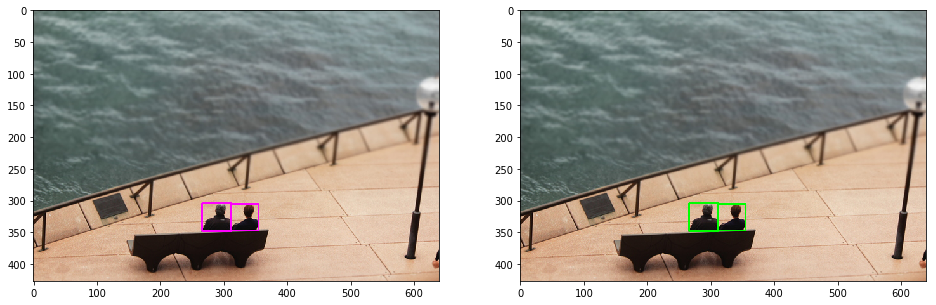

In [7]:
image_no=0
# image_no+=1
print(image_no)
input_img = cv2.imread('/home/jovyan/projectdata/cht01/hico_20160224_det/images/test2015/'+test_data['name'][image_no])
RGB_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
# RGB_img = cv2.resize(RGB_img,(1200,800))
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)
for i in retinanet_test_data['human_boxes_scale'][image_no]:
    cv2.rectangle(RGB_img, (i[0],i[1]),(i[2],i[3]), (255,0,255), 2)
ax1.imshow(RGB_img)
for i in retinanet_test_data['obj_boxes_scale'][image_no]:
    cv2.rectangle(RGB_img, (i[0],i[1]),(i[2],i[3]), (0,255,0), 2)
ax2.imshow(RGB_img)

for i in test_data['action_no'][image_no]:
    print(hoi_dict[str(i)])
print(test_data.iloc[image_no])